In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [2]:
data = pd.read_csv(r"C:\Users\שירה טיירי\Desktop\מטלת גמר מדעי הנתונים\archive (1)\insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Features

   * #### 'age'- 
   Age of primary beneficiary
   * #### 'sex'-
   Insurance contractor gender (female, male)
   * #### 'bmi'-
   Body Mass Index, providing an understanding of body, weights that are relatively high or low relative to height.
   * #### 'children'-
   Number of children covered by health insurance / Number of dependents
   * #### 'smoker'-
   Smoking (yes, no)
   * #### 'region'-
   The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
   * #### 'charges'-
   Individual medical costs billed by health insurance

In [3]:
# # Initialise the Scaler 
#  scaler = StandardScaler() 
# # To scale data 
#  scaler.fit(df) 

In [4]:
print("size of data:", data.shape)

size of data: (1338, 7)


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
30   male    37.430  3         no      northeast  5428.72770     1
             38.830  1         no      southeast  18963.17192    1
             44.220  2         no      southeast  4266.16580     1
31   female  21.755  0         no      northwest  4134.08245     1
                                                                ..
47   male    36.190  0         yes     southeast  41676.08110    1
             36.200  1         no      southwest  8068.18500     1
             38.940  2         yes     southeast  44202.65360    1
             47.520  1         no      southeast  8083.91980     1
18   female  20.790  0         no      southeast  1607.51010     1
Length: 1337, dtype: int64

In [8]:
data["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [9]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
labelencoder = LabelEncoder()
data['region'] = labelencoder.fit_transform(data['region'])
data['sex']=pd.get_dummies(data['sex'])
data['smoker']=pd.get_dummies(data['smoker'])
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,3,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520
5,31,1,25.740,0,1,2,3756.62160
6,46,1,33.440,1,1,2,8240.58960
7,37,1,27.740,3,1,1,7281.50560
8,37,0,29.830,2,1,0,6406.41070
9,60,1,25.840,0,1,1,28923.13692


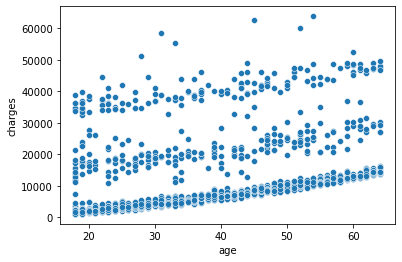

In [11]:
sns.scatterplot(x=data['age'], y=data['charges'])
plt.show()

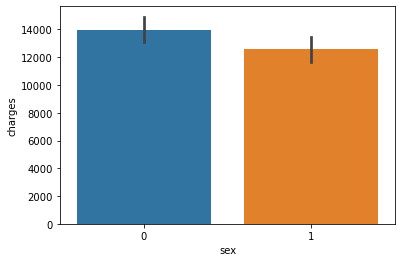

In [12]:
sns.barplot(x=data['sex'], y=data['charges'])
plt.show()

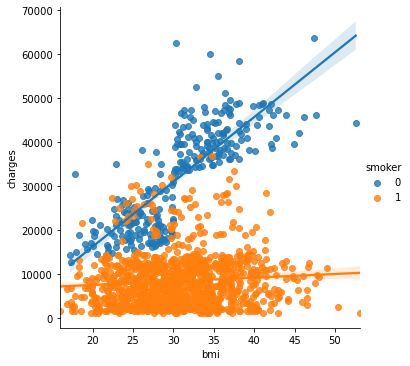

In [13]:
# sns.scatterplot(x=data['bmi'], y=data['charges'])
# plt.show()
sns.lmplot(x = 'bmi',y = 'charges', hue = 'smoker' , data=data)
plt.show()

As we can see from the plots, smoker tends to pay more charges than non smoker. The slope of the regression line of smoker is more steeper than the slope of the non smoker

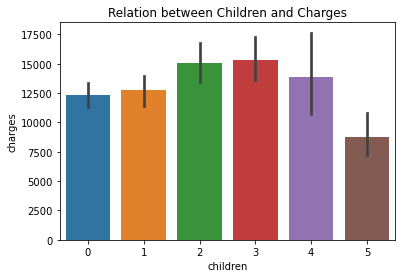

In [14]:
plt.title('Relation between Children and Charges')
sns.barplot(x=data['children'], y=data['charges'])
plt.show()

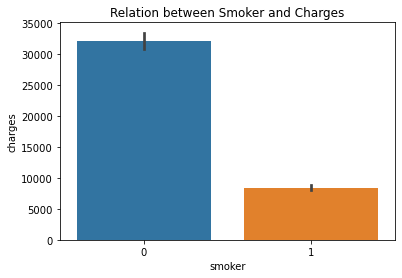

In [15]:
sns.barplot(x=data['smoker'], y=data['charges'])
plt.title("Relation between Smoker and Charges")
#plt.legend()
plt.show()

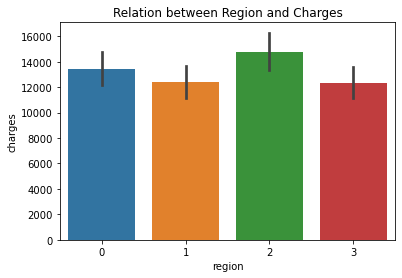

In [16]:
sns.barplot(x=data['region'], y=data['charges'])
plt.title("Relation between Region and Charges")
#plt.legend()
plt.show()

In [17]:
x = data.drop('charges', axis=1) # all columns whthout prediction column 
y = data.charges                 # prediction column 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)
print ("number of columns for the training:", x_train.shape,"number of columns for the test:", x_test.shape)
print ("number of prediction column for the training:",y_train.shape,"number of prediction column for the test:", y_test.shape) 

number of columns for the training: (1003, 6) number of columns for the test: (335, 6)
number of prediction column for the training: (1003,) number of prediction column for the test: (335,)


In [18]:

knn_model = KNeighborsRegressor(n_neighbors = 2).fit(x_train,y_train)

#knn = KNeighborsRegressor(n_neighbors=5)
#knn.fit(x_train, y_train)                  # Training of all columns and training of the prediction column
knn_predict = knn.predict(x_test)          # predictor (test)
# knn_accuracy = accuracy.score(y_test, knn_predict)           # Accuracy tester compared to the test prediction column
# knn_accuracy
knn_model.score(x_train,y_train)


NameError: name 'knn' is not defined

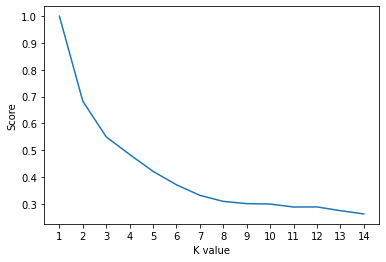

NameError: name 'knn' is not defined

In [20]:
arr = []
for i in range(1,15):
    knn2 = KNeighborsRegressor(n_neighbors = i)
    knn2.fit(x_train, y_train)
    linModel = KNeighborsRegressor(n_neighbors = i).fit(x_train,y_train)
    arr.append(linModel.score(x_train,y_train))
    
plt.plot(range(1,15), arr)
plt.xticks(np.arange(1,15,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
knn_scores = cross_val_score(knn, x, y, cv=4)
knn_model = KNeighborsRegressor(n_neighbors = 2).fit(x_train,y_train)
print("Cross Validation scores mean:",knn_scores.mean())
print("Score:" , knn_model.score(x_train,y_train))

In [21]:
regr = LinearRegression()
regr.fit(x_train,y_train)
lin_prediction = regr.predict(x_test)
#print("MAE:", mean_absolute_error(y_test, lin_prediction))
linModel = LinearRegression().fit(x_train,y_train)
print("Score:" ,linModel.score(x_train,y_train))
lin_scores = cross_val_score(linModel, x, y, cv=5)
print("Cross Validation scores mean:",lin_scores.mean())

Score: 0.7599694483533166
Cross Validation scores mean: 0.7472559473580954


In [22]:
model = DecisionTreeRegressor(random_state = 0)
model.fit(x_train, y_train)
dtr_prediction = model.predict(x_test)
dtrModel = DecisionTreeRegressor().fit(x_train,y_train)
print("Score: ", dtrModel.score(x_train,y_train))
dtr_scores = cross_val_score(dtrModel, x, y, cv=5)
print("Cross Validation scores mean:", dtr_scores.mean())


Score:  1.0
Cross Validation scores mean: 0.7186812508234472
